In [ ]:
!pip install pyLDAvis

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import re
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/apify_group_scrape.csv')
print(data)

                     Poster  Comments                      time  Reactions  \
0            Michelle Scott         7  2023-08-15T00:55:37.000Z         94   
1    Paulette Planidin West        11  2023-08-14T08:24:57.000Z         68   
2           Trinity Bourque        11  2023-09-06T19:35:49.000Z          2   
3          Elizabeth Kikoak         9  2023-08-14T13:21:37.000Z         11   
4             Brenda Breton         8  2023-08-27T06:26:32.000Z         14   
..                      ...       ...                       ...        ...   
400            Kathy Lepine         2  2023-08-17T14:12:42.000Z          4   
401         Lizzie Cardinal         0  2023-08-17T05:41:27.000Z          4   
402           Sadetło Scott         1  2023-08-17T05:18:04.000Z          0   
403            Ginger Milne         4  2023-08-17T05:28:03.000Z         15   
404            Tanya Ashley        15  2023-08-16T21:32:55.000Z          1   

     Reposts                                            Content

In [ ]:
data = data.drop(columns=['Poster'])

In [ ]:
print(data['Reactions'].isna().sum())
print(data['Comments'].isna().sum())
print(data['Reposts'].isna().sum())

0
0
0


In [ ]:
import re

# Remove special characters from the 'Text' column
data['Content'] = data['Content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Print the updated DataFrame
print(data['Content'])

0            Daniel Scott and I made it out and are safe
1      Brian Teagan  I oh and Snoopy are safe in Grim...
2      does anyone kno where Timmy Nadaray may be sta...
3         Anyone know if Lee John Kikoak got on a flight
4      I am safe and comfy Shaws Point Resort  Beauti...
                             ...                        
400    The new evacuation Center to register is Leduc...
401            This is in Paddle Prairie Mtis Settlement
402    Note Valleyview centre has changed  see new in...
403    I wanted to put this out there while I have wi...
404    Does anyone know approximately where cell serv...
Name: Content, Length: 405, dtype: object


In [ ]:
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [ ]:
data['Content'] = data['Content'].apply(preprocess_text)
data['Content'] = data['Content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
corpus = [i for i in data['Content']]
print(corpus)

['daniel scott made safe', 'brian teagan oh snoopy safe grimshaw night brother wayne jim well fred elaine peace river', 'anyone kno timmy nadaray may staying asking uncle', 'anyone know lee john kikoak got flight', 'safe comfy shaw point resort beautiful privately owned fishing park come stay', 'melissa hardisty im safe northern alberta heading edmonton', 'people fort re', 'former yellowknifers accommodate anyone nwt evacuating manitoba pick airport etc also room camper tent property manitoba long need send u direct message safe travel family friend love karen sylvain amyotte', 'ft prov traffic yk nut', 'hi family live south calgary empty upstairs two bedroom bathroom would willing host family looking somewhere stay lieu evacuation yellowknife live country outside pet someone flying calgary would willing come pick airport allison', 'canadian native friendship centre edmonton bag lunch ampm pmpm also food hamper please call kateao deanna', 'steen river free gas', 'bluewave energy high l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [ ]:
count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()
print(count_vect.get_feature_names_out())

['aaron' 'aastha' 'aasthacabinradioca' ... 'yves' 'zoebeaulieu' 'zone']


In [ ]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [ ]:
dimension = 5
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
print(lda_array)

[[0.06947901 0.06951195 0.72220902 0.06946311 0.0693369 ]
 [0.04236179 0.04239335 0.04276704 0.04250927 0.82996854]
 [0.05364962 0.05345737 0.05386402 0.053651   0.785378  ]
 ...
 [0.7849955  0.05461854 0.05337631 0.05349642 0.05351323]
 [0.02759226 0.02860104 0.02763348 0.02864687 0.88752635]
 [0.04633312 0.04651203 0.04625815 0.81451223 0.04638447]]


In [ ]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names_out()
important_words = [sorted(features, key = lambda x: components[j][np.where(features == x)[0][0]], reverse = True)[:3] for j in range(len(components))]
print(important_words)

[['anyone', 'safe', 'edmonton'], ['edmonton', 'safe', 'centre'], ['river', 'peace', 'safe'], ['high', 'level', 'safe'], ['fyi', 'fort', 'evacuee']]


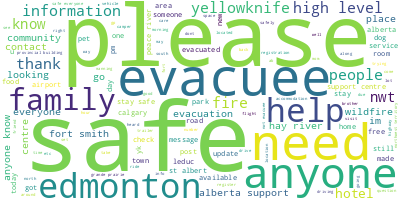

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['Content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

words = data['Content'].values
data_words = list(sent_to_words(words))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words)

[['daniel', 'scott', 'made', 'safe'], ['brian', 'teagan', 'oh', 'snoopy', 'safe', 'grimshaw', 'night', 'brother', 'wayne', 'jim', 'well', 'fred', 'elaine', 'peace', 'river'], ['anyone', 'kno', 'timmy', 'nadaray', 'may', 'staying', 'asking', 'uncle'], ['anyone', 'know', 'lee', 'john', 'kikoak', 'got', 'flight'], ['safe', 'comfy', 'shaw', 'point', 'resort', 'beautiful', 'privately', 'owned', 'fishing', 'park', 'come', 'stay'], ['melissa', 'hardisty', 'im', 'safe', 'northern', 'alberta', 'heading', 'edmonton'], ['people', 'fort'], ['former', 'yellowknifers', 'accommodate', 'anyone', 'nwt', 'evacuating', 'manitoba', 'pick', 'airport', 'etc', 'also', 'room', 'camper', 'tent', 'property', 'manitoba', 'long', 'need', 'send', 'direct', 'message', 'safe', 'travel', 'family', 'friend', 'love', 'karen', 'sylvain', 'amyotte'], ['ft', 'prov', 'traffic', 'yk', 'nut'], ['hi', 'family', 'live', 'south', 'calgary', 'empty', 'upstairs', 'two', 'bedroom', 'bathroom', 'would', 'willing', 'host', 'family',

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"know" + 0.011*"anyone" + 0.010*"please" + 0.008*"fort" + '
  '0.007*"community" + 0.006*"smith" + 0.006*"edmonton" + 0.006*"people" + '
  '0.006*"fire" + 0.006*"safe"'),
 (1,
  '0.010*"evacuee" + 0.008*"anyone" + 0.008*"centre" + 0.007*"safe" + '
  '0.007*"nwt" + 0.006*"need" + 0.006*"home" + 0.005*"stay" + 0.005*"calgary" '
  '+ 0.005*"please"'),
 (2,
  '0.011*"please" + 0.009*"evacuee" + 0.009*"safe" + 0.009*"high" + '
  '0.009*"anyone" + 0.008*"river" + 0.008*"level" + 0.007*"nwt" + 0.006*"know" '
  '+ 0.006*"centre"'),
 (3,
  '0.011*"centre" + 0.010*"alberta" + 0.008*"evacuee" + 0.008*"fort" + '
  '0.007*"smith" + 0.007*"help" + 0.007*"fire" + 0.007*"safe" + '
  '0.006*"evacuation" + 0.006*"river"'),
 (4,
  '0.025*"safe" + 0.014*"river" + 0.012*"anyone" + 0.011*"stay" + 0.009*"know" '
  '+ 0.007*"peace" + 0.007*"please" + 0.007*"yellowknife" + 0.006*"people" + '
  '0.006*"looking"'),
 (5,
  '0.016*"safe" + 0.014*"centre" + 0.012*"alberta" + 0.011*"support" + '
  '0.0

In [ ]:
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let's create them.
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)


Dictionary<2270 unique tokens: ['daniel', 'made', 'safe', 'scott', 'brian']...>


In [ ]:
def compute_coherence_score(dictionary, corpus, texts, limit, start = 2, step = 1):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, random_state=100, chunksize=200, passes=10, per_word_topics=True, id2word=id2word)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

  return model_list, coherence_values


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=8,
                                                    random_state=100,
                                                    chunksize=200,
                                                    passes=10,
                                                    alpha=a,
                                                    eta=b,
                                                    per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 7
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

In [ ]:
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
              corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation Set': [],
'Topics': [],
'Alpha': [],
'Beta': [],
'Coherence': []}
if 1 == 1:
  pbar = tqdm.tqdm(total=540)
  for i in range(len(corpus_sets)):
    for k in topics_range:
    # iterate through alpha values
      for a in alpha:
      # iterare through beta values
        for b in beta:
          # get the coherence score for the given parameters
          cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
          # Save the model results
          model_results['Validation Set'].append(corpus_title[i])
          model_results['Topics'].append(k)
          model_results['Alpha'].append(a)
          model_results['Beta'].append(b)
          model_results['Coherence'].append(cv)
          pbar.update(1)
  pd.DataFrame(model_results).to_csv('Ida_tuning_results_new.csv', index=False)
  pbar.close


 56%|█████▌    | 300/540 [12:20<09:52,  2.47s/it]

 56%|█████▌    | 300/540 [06:18<05:37,  1.41s/it]

In [ ]:
 model_list, coherence_values = compute_coherence_score(dictionary=id2word, corpus=corpus, texts=data_words, limit=10, start=2, step=1)

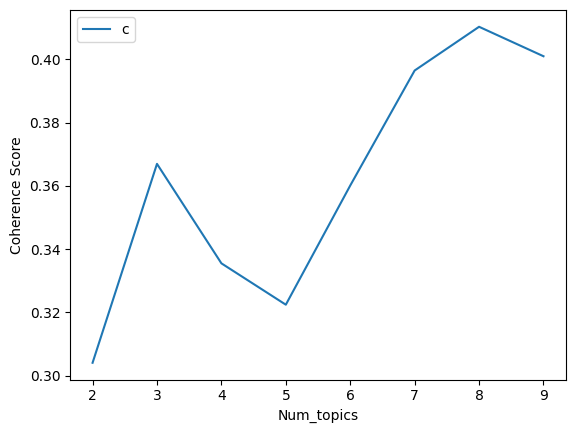

In [ ]:
limit=10
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num_topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
  print("Num topics = ", m, "has coherence value of", cv)

Num topics =  2 has coherence value of 0.30404159437027156
Num topics =  3 has coherence value of 0.36695838522640417
Num topics =  4 has coherence value of 0.3354960076070672
Num topics =  5 has coherence value of 0.32241249406448347
Num topics =  6 has coherence value of 0.3601088705036411
Num topics =  7 has coherence value of 0.39648700173228396
Num topics =  8 has coherence value of 0.410316676965226
Num topics =  9 has coherence value of 0.4009995912759978


In [ ]:
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=6,
                                                  random_state = 100,
                                                  chunksize=200,
                                                  passes=10,
                                                  alpha='asymmetric',
                                                  eta=0.61,
                                                  per_word_topics=True)
#passes: Number of passes through the entire corpus
#chunksize: Number of documents to load into memory at a time and process E step of EM.

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.49883297779573343


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./sample_data/results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './sample_data/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.035308  0.073798       1        1  53.978129
3      0.056803  0.005428       2        1  16.607609
5      0.058432 -0.058208       3        1  15.210556
0     -0.254066 -0.005151       4        1   9.766512
4      0.052964 -0.007995       5        1   2.977643
2      0.050558 -0.007872       6        1   1.459551, topic_info=          Term       Freq      Total Category  logprob  loglift
859       town  33.000000  33.000000  Default  30.0000  30.0000
18      anyone  50.000000  50.000000  Default  29.0000  29.0000
2         safe  46.000000  46.000000  Default  28.0000  28.0000
149    prairie  26.000000  26.000000  Default  27.0000  27.0000
118     please  43.000000  43.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1719  directly   0.096606   2.664570   Topic6  -7.0462   0.9099
447      today   0.154282  12.029426   Topic6  -6.5781  -0.1293
1096      tell   0.094565   2.854813   Topic6  -7.0676   0.8196
728       near   0.095058   5.361108   Topic6  -7.0624   0.1946
694     showed   0.082948   2.134135   Topic6  -7.1987   0.9794

[317 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2253      1  0.149765     actually
2253      4  0.748823     actually
43        1  0.232392      alberta
43        2  0.650697      alberta
43        3  0.092957      alberta
...     ...       ...          ...
295       1  0.605900     wrangler
105       1  0.861917  yellowknife
105       2  0.086192  yellowknife
105       3  0.043096  yellowknife
82        1  0.937216           yk

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 1, 5, 3])

In [ ]:
# Wordcloud of Top N words in each topic
import wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors. TABLEAU_COLORS. items()] # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words, background_color='white', width=2500, height=2800, max_words=15, colormap='tab10', color_func=lambda *args, **kwargs: cols[i], prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
print(topics)

[(0, [('know', 0.010816611), ('anyone', 0.010633059), ('please', 0.009519326), ('fort', 0.007749525), ('community', 0.0071624247), ('smith', 0.0064993175), ('edmonton', 0.006212975), ('people', 0.006138733), ('fire', 0.0060004145), ('safe', 0.0059617274)]), (1, [('evacuee', 0.010145043), ('anyone', 0.008342899), ('centre', 0.007516254), ('safe', 0.007065844), ('nwt', 0.0067804847), ('need', 0.0064590964), ('home', 0.0056571593), ('stay', 0.0054095727), ('calgary', 0.0054067057), ('please', 0.005360555)]), (2, [('please', 0.010904131), ('evacuee', 0.009070961), ('safe', 0.009027162), ('high', 0.00880881), ('anyone', 0.008718034), ('river', 0.008371011), ('level', 0.007859375), ('nwt', 0.006697307), ('know', 0.006414274), ('centre', 0.0056734816)]), (3, [('centre', 0.01117486), ('alberta', 0.010048524), ('evacuee', 0.008321057), ('fort', 0.008237704), ('smith', 0.007155301), ('help', 0.0071122474), ('fire', 0.0066103274), ('safe', 0.0065782396), ('evacuation', 0.006043452), ('river', 0.0

<function matplotlib.pyplot.show(close=None, block=None)>

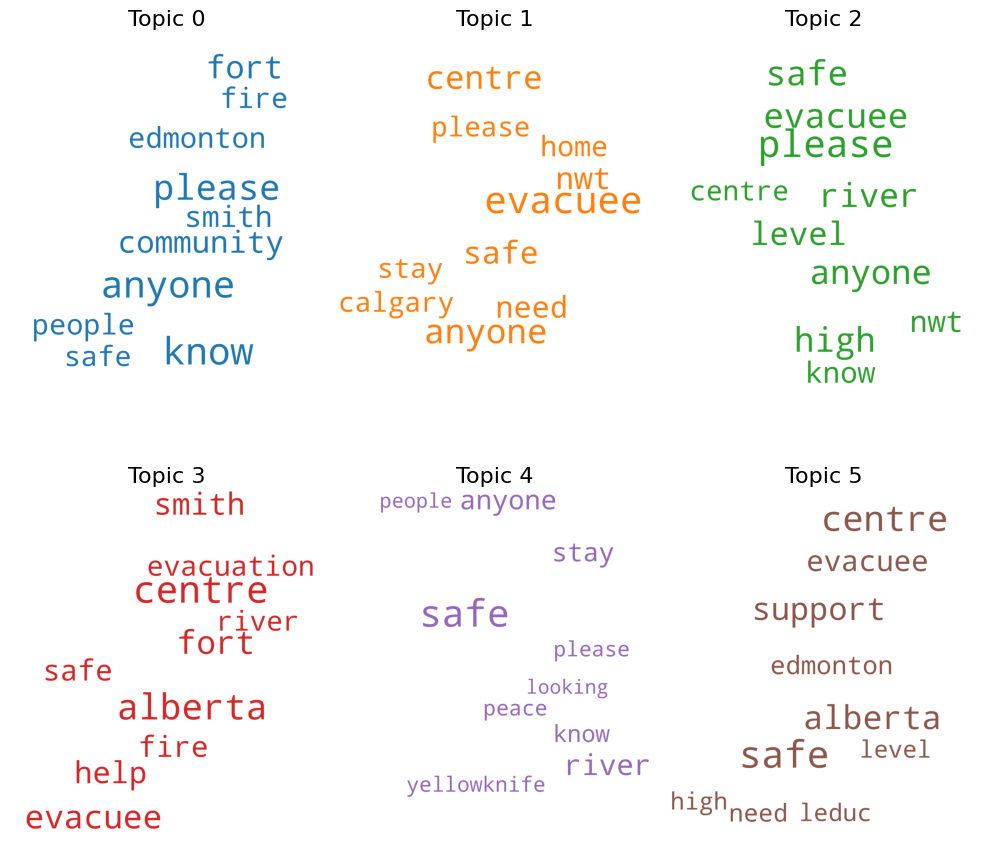

In [ ]:
fig, axes = plt. subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  topic_words = dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words, max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show